<font color=green> Привет еще раз. Спасибо, что доделала работу. Мои комментарии к исправленным замечаниям будут выделены зеленым цветом. Если же потребуется доработка некоторых пунктов проекта, то я отмечу это <font color=red>красным цветом. 
    
---

<font color=brown> Привет. На этот раз я обозначу комментарии коричневым цветом. 
    
---

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Привет! Спасибо, что прислала задание:) Мои комментарии обозначены пометкой **Комментарий наставника**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно; <font color=orange>оранжевый</font> - есть замечания, но не критично; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 

</div>

# Определение закономерностей успешности игры

## Дано: Интернет-магазин "Стримчик", продающий игры по всему миру. 
## Необходимо: спрогнозировать продажи на потенциально прибыльные игры на лучше продаваемых платформах.
## Для решения задачи возьмем исторические данные из открытых источников о продажах игр, отзывах пользователей и популярных платформах.

У нас дана таблица, состоящая из записей о играх разного времени и разных жанров. Данные распределены таким образом:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Правильно, что есть краткое вступление в работу, описание того, что надо делать. В работе следует приводить краткий план того, что надо сделать (если этот план имеется), а также информацию о входных данных: какие столбцы есть в таблице, их названия и какую информацию они несут. Так работа выглядит презентабельно. 

</div>

### Этап 1. Изучение данных.

1. Импорт библиотек и загрузка данных.

In [1]:
import pandas as pd # Библиотека pandas для анализа данных
from pylab import rcParams # Увеличение дефолтных размеров графика в тетрадке Jupiter
rcParams['figure.figsize'] = 8, 5 

import seaborn as sns # Seaborn содержит более адекватные дефолтные настройки для оформления графиков
sns.set(color_codes=True)

import matplotlib.pyplot as plt # Matplotlib для реализаций функции plot и для гибкого настраивания графиков
import numpy as np              # Numpy для работы с матрицами и массивами (высокоуровневые математические функции)
import scipy.stats as st        # Используем методы библиотеки scipy для работы с гипотезами
from functools import reduce    # Для работы с функциями и последовательностями
idx = pd.IndexSlice      
from scipy import stats as st   # Для проверок статитеческих значимостей

2. Прочитаем данные (метод read_csv) из табличного файла расширения .csv . И назовем наш DataFrame - games.

In [2]:
games = pd.read_csv('/datasets/games.csv') # Назовем наш датафрейм games

Посмотрим на первые 5 строк с помощью метода head()

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Для просмотра общей информацию по датафрейму, воспользуемся методом info()

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Как видно из предоставленных данных, что они не полные. Например, есть строки 16715 и 9949 (Rating). А также данные даны в разных типах, как object, нужно их привести к  float или int для дальнейшей работы с ними. И приведем в порядок названия столбцов.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Подумай также о возможных причинах появления пропусков, а также о том, являются ли они случайными или нет. Можно высказать предварительные варианты их обработки. 

Первый взгляд на таблицу выполнен.

</div>

### Этап 2. Изучение данных.

1. Приведем к нижнему регистру названия столбоцов методом str.lower()

In [6]:
games.columns = games.columns.str.lower() # все столбцы написаны нижним регистром
display(games.head(5)) # выведем первые 5 строк и посмотрим на названи столбцов, чтобы убедиться

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Таблицы на печать выводи с помощью метода display. 

</div>

2. Некоторые данные pandas считал как object, приведем к типам float или int.
Например, годе выпуска (с float вещественный) — на целочисленный integer).

In [7]:
games['year_of_release'].isna().value_counts()

False    16446
True       269
Name: year_of_release, dtype: int64

По ответу на команду видно, что 269 значений пропущено. Так как нет возможности их восстановить, промаркируем пропущенные значения в -1, 
и в дальнейшем анализе не будем их использовать. 
Используем метод fillna().

In [8]:
games['year_of_release'].fillna(-1, inplace=True)
games['year_of_release'] = games['year_of_release'].astype('int')

3. С оценкой пользователей (столбец 'user_score') ситуация похожа: часть значений пропущена, а также есть 
    некоторое количество оценок имеют значение 'tbd'. Заменим все эти значения также на -1, все остальные значения, 
    которые будут использованы в анализе — на вещественный тип данных.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Верно, по своей сути tbd и является Nan. 

</div>

In [9]:
games.loc[(games['user_score'] == 'tbd') | (games['user_score'].isna()), 'user_score'] = -1
games['user_score'] = pd.to_numeric(games['user_score'])

4. Удалим строки с пропущенными названиями игр в столбце 'name'

In [10]:
games.dropna(subset=['name'], inplace=True)

5. А также обработаем пропущенные значения в оценках критиков ('critic_score') и рейтингов ESRB ('rating'). 
Поскольку точно заменить пропущенные значения не представляется возможным, заменим пропущенные значения на -1.

In [11]:
for column in ['critic_score', 'rating']:
    games.loc[games[column].isna(), column] = -1
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,-1
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,-1
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,-1


In [12]:
games.duplicated().sum()

0

Посмотрим на полученный размер данных методом shape

In [13]:
print(games.shape)

(16713, 11)


6. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец под названием ['total_sales']

In [14]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
display(games['total_sales'])

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16713, dtype: float64

Итак, данные подготовлены для дальнейшей работы. А именно: 
- названия столбцов приведены к нижнему регистру (чтобы удобно было к ним обращаться),
- обработаны пропущенные значения;
- пропуски в столбце 'name' были удалены;
- произвели замену в рейтинге 'rating' - аббревиатуры 'tbd' на значение -1;
- год выпуска из типа 'float' приведен в целое число, потому что у нас нету года 2001.1 или 2000.0, года у нас в целых числах.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Верно, лучше работать с меньшим количеством данных хорошего качества. Пропуски обработаны маркерными значениями. Так мы просто пометили места пропусков. Главное помнить об этом и не использовать их в анализе.
    
Ошибки в данных устранены. Пропуски обработаны там, где возможно. Данные подготовлены к дальнейшему анализу. 

</div>

## Этап 3. Исследовательский анализ данных

1. Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

'C помощью параметра kind можно сделать столбчатый график, например, на bar chart. \nMatplotlib позволяет очень гибко настраивать графики. \nНа графике можно изменить почти все, что угодно, но потребуется порыться в документации и найти нужные параметры.\nНапример, параметр rot отвечает за угол наклона подписей к оси x.'

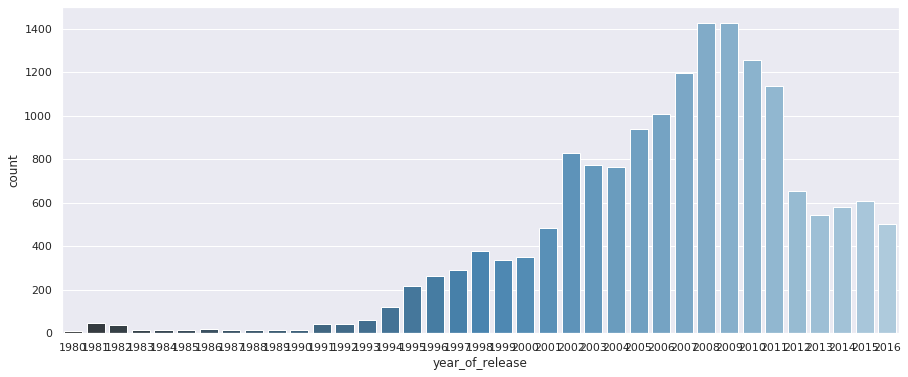

In [39]:
# Сделаем сводную таблицу
time_game = games.query('year_of_release != -1')
time_games = time_game.pivot_table(index='year_of_release', values='total_sales', aggfunc='count')
time_games.columns = ['count']
# построим график

f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x=time_games.index, y="count", data=time_games, palette="Blues_d")
"""C помощью параметра kind можно сделать столбчатый график, например, на bar chart. 
Matplotlib позволяет очень гибко настраивать графики. 
На графике можно изменить почти все, что угодно, но потребуется порыться в документации и найти нужные параметры.
Например, параметр rot отвечает за угол наклона подписей к оси x."""

<font color=brown> Значения -1 лучше отфильтровать. Это же нереальный год.  
    
---

отфильтровала

Как видно из графика данные по нормальному распределению можно брать с 1994 года.

2. Посмотрим, как менялись продажи по платформам.

2.1 Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [16]:
total_sales_platform = games.query('year_of_release != -1') # убираем промарикированные значения -1

total_sales_platform = (games.groupby(['platform'],as_index = False)['total_sales'].sum()
                                 .sort_values('total_sales',ascending = False)
                           ) # Посмотрим сводную таблицу

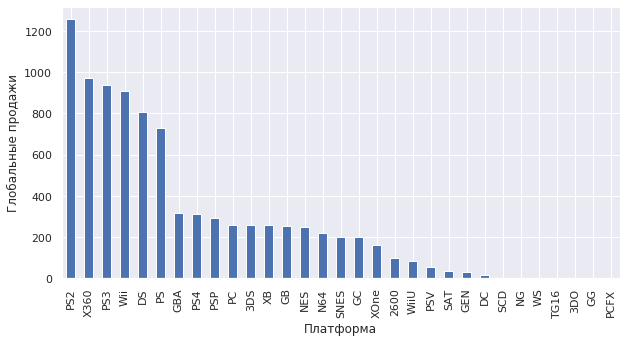

In [17]:
# построим график

(total_sales_platform.plot(kind='bar',x='platform', y='total_sales',figsize=(10, 5),legend=False)
                         .set(xlabel='Платформа', ylabel='Глобальные продажи')
)
plt.show()

График нам показывает, что лидируют 6 платформ (PS2, X360, PS3, Wii, DS, PS) с большим отрывом, построим по ним распределение по годам.

2.2 Найдем среднюю продолжительность жизни игровой платформы.

Для этого возьмем для анализа топ-6 платформ и посмотрим сколько они "прожили".

In [18]:
top_6 = total_sales_platform.head(6)['platform'].tolist()
top_6

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

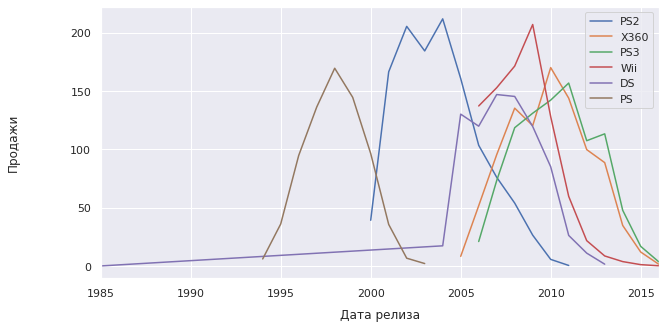

In [19]:
for name in top_6:
    games.query('platform == @name and year_of_release != -1').pivot_table(index = 'year_of_release',
                        values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['total_sales'].plot(figsize = (10, 5), label=name)
   
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 50)
    plt.legend()

По графику видим, что платформа появляется и исчезает в течение примерно 8-10 лет.
Поэтому, для нашего прогноза целесообразно рассмотреть период за последние 5 лет, т.е те платформы которые набирают популярность, либо находятся на пике.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Верное значение по средней продолжительности существования платформы. Здорово, что приведены его расчеты. 

</div>

3. Узнаем какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ

In [20]:
actual_platforms = games.query('year_of_release >= 2012')
top_actual_platforms = (actual_platforms.groupby(['platform'],as_index = False)['total_sales'].sum()
                                 .sort_values('total_sales',ascending = False)
                           )
top_actual_platforms

,platform,total_sales
4,PS4,314.14
3,PS3,288.79
9,X360,236.54
0,3DS,194.61
10,XOne,159.32
8,WiiU,82.19
2,PC,62.65
6,PSV,49.18
7,Wii,35.37
1,DS,12.55


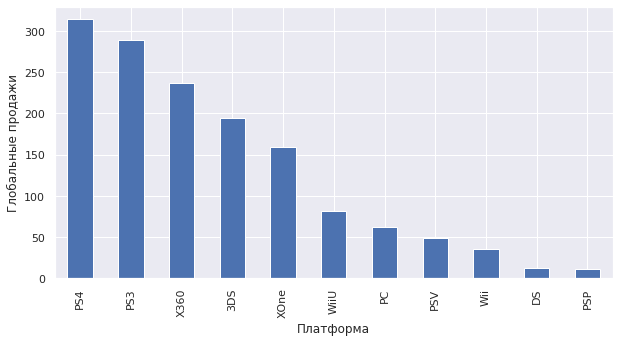

In [21]:
# Построим график
(top_actual_platforms.plot(kind='bar',x='platform', y='total_sales',figsize=(10, 5),legend=False)
                         .set(xlabel='Платформа', ylabel='Глобальные продажи')
)
plt.show()

In [22]:
# Выведем списком топовых по продажам платформ
top = top_actual_platforms['platform'].tolist()
top

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']

Построим график

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Выбран правильный актуальный год. Так в рассмотрение попадут только последние поколения платформ. 

</div>

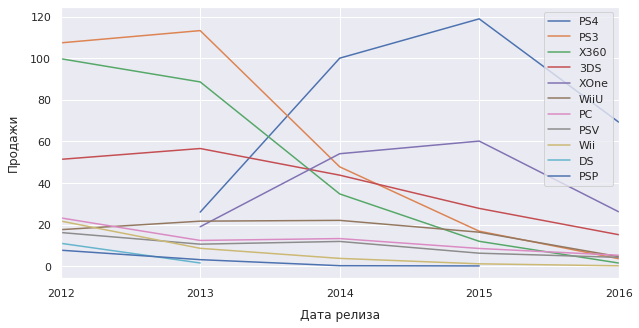

In [23]:
for name in top:
    actual_platforms.query('platform == @name').pivot_table(index = 'year_of_release',
                        values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['total_sales'].plot(figsize=(10, 5), label = name)
    
    plt.xticks(np.arange(2012, 2017, step=1))
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 10)
    plt.legend()

Как видно, что продажи падают на всех платформах. Хорошие продажи показывают только PS4 (синяя линия) и XOne (фиолетовая линия). Выберем эти платформы для дальнейшего анализа.

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Подобные таблицы лучше визуализировать. Так информация будет легче восприниматься. 

</div>

<div class="alert alert-danger">
<h2> Комментарий наставника</h2>

На данном периоде надо рассматривать все платформы, которые активны в нем, а не только самые популярные. Ведь популярность мы определяем по суммарной выручке, а у новых платформ ее еще нет, т.к. они только вышли. Из-за данного обстоятельства потеряна одна перспективная платформа. Найди ее.  

</div>

In [24]:
#  Сделаем сводную таблицу
best_sales_platforms = actual_platforms.query('platform == "PS4" or platform == "XOne"')
best_platforms_stat = (best_sales_platforms.groupby(['platform','year_of_release'],as_index = False)['total_sales'].sum()
                                 .sort_values('platform',ascending = False)
                           )
best_platforms_stat

,platform,year_of_release,total_sales
4,XOne,2013,18.96
5,XOne,2014,54.07
6,XOne,2015,60.14
7,XOne,2016,26.15
0,PS4,2013,25.99
1,PS4,2014,100.00
2,PS4,2015,118.90
3,PS4,2016,69.25


<font color=brown> XOne и есть та самая потерянная платформа. 
    
---

4. Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Посмотрим велика ли разница в продажах? А в средних продажах на разных платформах? Опишем результат.

[(0, 5)]

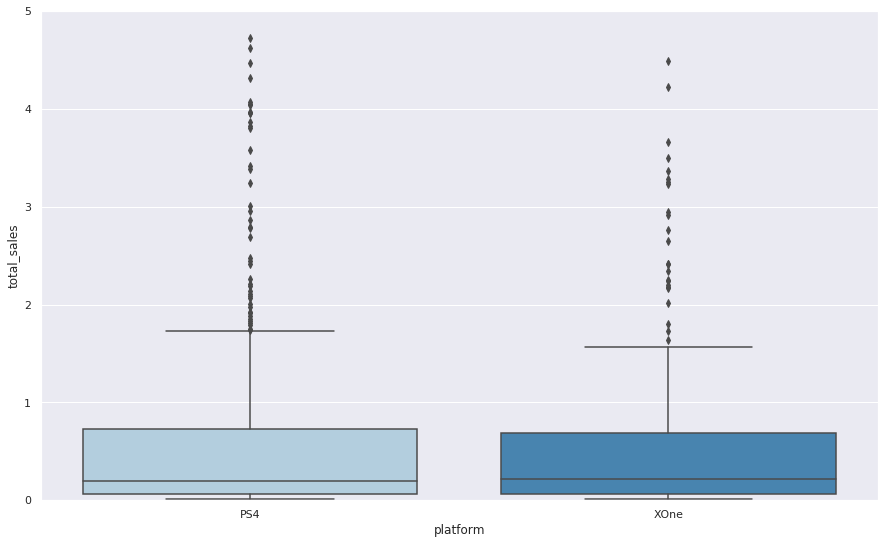

In [25]:
sns.set(rc={'figure.figsize':(15,9)}) # здесь я настраиваю размер самого графика в jupyter
ax = sns.boxplot(x="platform", y="total_sales", data=best_sales_platforms, palette="Blues")
ax.set(ylim=(0,5))

По средним и медианным значениям посмотрим велика ли разница в продажах на этих платформах.

In [26]:
best_platforms_mean = (best_sales_platforms.pivot_table(index = 'platform'
                                                                 ,values='total_sales'
                                                                 ,aggfunc = ['mean','median']) 
                                )
best_platforms_mean

,mean,median
,total_sales,total_sales
platform,,
PS4,0.801378,0.20
XOne,0.645020,0.22


Видим, что в среднем одна игра выпущенная на платформе приносит менее 1 млн доллара. Но, нужно учитывать и "хиты продаж", которые принесли более 1 млн доллара, поэтому смотрим медианные значения порядка 200-220 тыс долларов.

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>
 
Подумай, из-за чего формируется разница между платформами. 

</div>

5. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройм диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сделаем выводы и соотнесем их с продажами игр на других платформах.

In [27]:
ps4 = best_sales_platforms.query("platform == 'PS4'")
xone = best_sales_platforms.query("platform == 'XOne'")

In [28]:
# отфильтруем таблицу от маркерных значений -1
ps4_sales = ps4.query('platform == "PS4" and (user_score != -1) and (critic_score != -1)')

<font color=brown> Маркерные значения в анализ не включаются больше. Это нереальные данные, анализировать их не стоит. Они только вызывают смещение результата. 
    
---

In [29]:
influence = ['user_score', 'critic_score', 'total_sales']
ps4_sales[influence].corr().style.background_gradient(axis=1)

,user_score,critic_score,total_sales
user_score,1,0.557654,-0.033625
critic_score,0.557654,1,0.405895
total_sales,-0.033625,0.405895,1


-0.03
0.41


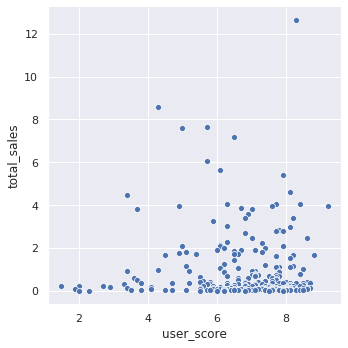

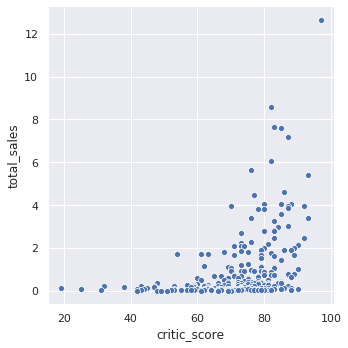

In [30]:
# построим график
for column in ['user_score', 'critic_score']:
    print(round(ps4_sales[column].corr(ps4_sales['total_sales']), 2))
    sns.relplot(x=column, y="total_sales", data=ps4_sales)

Как видно отзывы пользователей никак не влияют на продажи игр, в то время как отзывы критиков имеют небольшой вес в продажах: коэффициенты корреляции -0,03 и 0,41 соответственно. Ответ корреляции 0.41 ближе к нулю, чем к 1 (Коэффициент Пирсона от -1 до 1), что говорит нам о низкой взаимосвязи. Если была она бы ближе к 1, тем сильнее была бы связь. Возможно связь более сложная и имеет не линейный характер.

In [31]:
# проделаем тоже самое и с платформой Xone
xone_sales = xone.query('platform == "XOne" and (user_score != -1) and (critic_score != -1)')

In [32]:
influence = ['user_score', 'critic_score', 'total_sales']
xone_sales[influence].corr().style.background_gradient(axis=1)

,user_score,critic_score,total_sales
user_score,1,0.472462,-0.0940032
critic_score,0.472462,1,0.410422
total_sales,-0.0940032,0.410422,1


-0.09
0.41


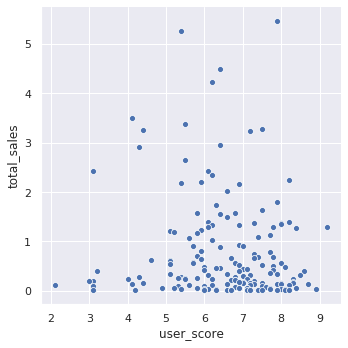

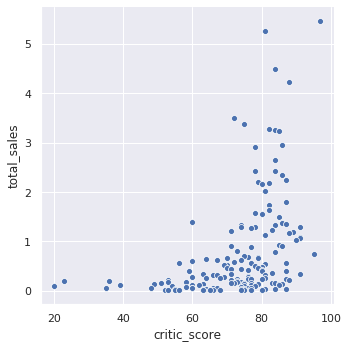

In [33]:
# построим график
for column in ['user_score', 'critic_score']:
    print(round(xone_sales[column].corr(xone_sales['total_sales']), 2))
    sns.relplot(x=column, y="total_sales", data=xone_sales)

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Результат верный. Подумай, чем он вызван.

</div>

5.2 Соотнесем результаты по ps4 c продажами игр на других платформах.

In [34]:
actual_games = actual_platforms.copy()


PS3:
Коэффициент корреляции user_score и total_sales: 0.0
Коэффициент корреляции critic_score и total_sales: 0.33

XOne:
Коэффициент корреляции user_score и total_sales: -0.09
Коэффициент корреляции critic_score и total_sales: 0.41

PS3:
Коэффициент корреляции user_score и total_sales: 0.0
Коэффициент корреляции critic_score и total_sales: 0.33

X360:
Коэффициент корреляции user_score и total_sales: -0.0
Коэффициент корреляции critic_score и total_sales: 0.36


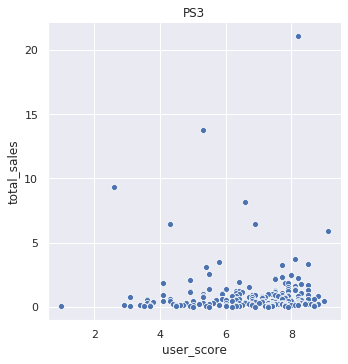

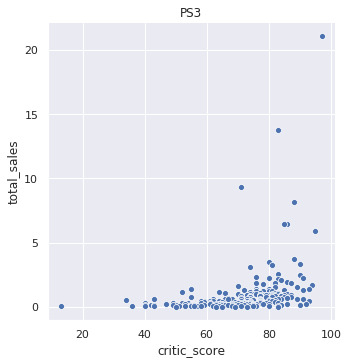

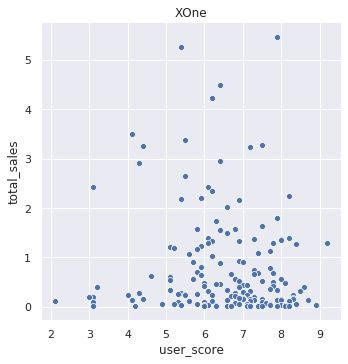

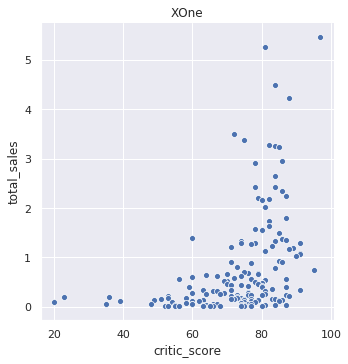

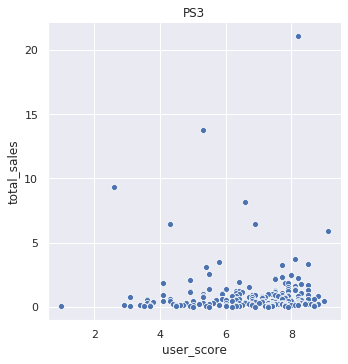

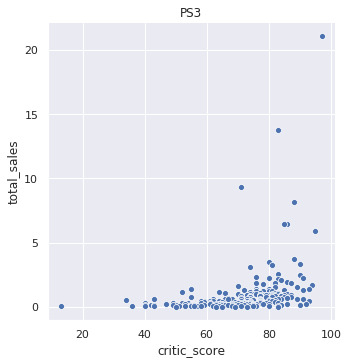

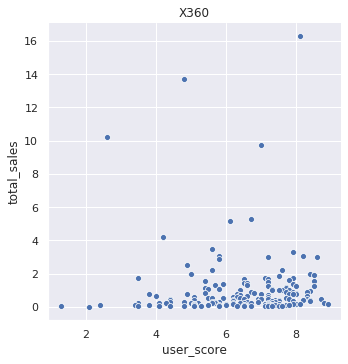

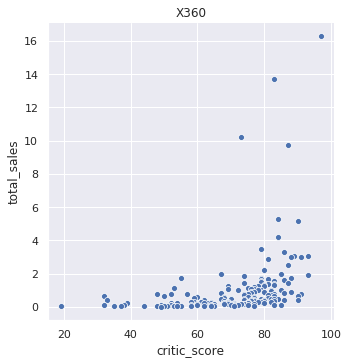

In [35]:
# посчитаем коэффициент корреляции для отзывов пользователей и критиков относительно объема продаж
# и построим корреляционную диаграмму
for platform in ['PS3', 'XOne', 'PS3', 'X360']:
    print('\n{0}:'.format(platform))
    for column in ['user_score', 'critic_score']:
        temp = actual_games.query('platform == @platform and (user_score != -1) and (critic_score != -1)')
        print('Коэффициент корреляции {0} и total_sales: {1}'.\
              format(column, round(temp[column].corr(temp['total_sales']), 
    2)))
        sns.relplot(x=column, y="total_sales", data=temp)
        _ = plt.title(platform)

In [36]:
import plotly
plotly.offline.plot(fig, filename='ps_pl.html', show_link=False) # Можно сразу сохранить график в виде html-файла.

NameError: name 'fig' is not defined

Выводы для других платформ аналогичны. Следовательно, для всех платформ характерно среднее влияние отзывов критиков на продажи и отсутствие влияния отзывов пользователей.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Здорово, что рассмотрены несколько платформ. 

</div>

5. Посмотрим на общее распределение игр по жанрам.
Выведем график для того, чтобы посмотреть какие игры больше всего в жанрах в зависимости от продаж.

In [ ]:
genre_sales = actual_games.pivot_table(index='genre', values='total_sales', aggfunc='sum')
genre_sales.sort_values('total_sales', ascending=False)

In [ ]:
sns.catplot(x='genre', y="total_sales", kind="box", data=actual_games, height=6, aspect=2.7)
_ = plt.ylim(0, 3)

Как видно из графика, shooter по средним продажам лидирует по сравнению с остальными жанрами игр, а action, напротив, по этому критерию отстает, однако, является в целом популярным жанром из-за наибольшего объема продаж. Игры-приключения и игры-головоломки (puzzle), как правило, не пользуются большой популярностью: их абсолютные и средние продажи одни из самых низких среди всех жанров.

Выясним, какие жанры у самых продаваемых игр за все время:

In [ ]:
games.pivot_table(index=['name', 'genre'], values='total_sales', aggfunc='sum').nlargest(10, 'total_sales')

Интересно, что самая продаваемая игра из жанра sports, а не из shooter или action . Игра жанра action только на втором месте, а замыкает первую тройку - игра из жанра platform.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Правильно, но не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 

</div>

# Этап 4. Составление портрета пользователя каждого региона

1. Для начала посмотрим на топ-5 платформ в каждом регионе, приведенном в таблице

In [ ]:
na_sales = actual_games.pivot_table(index='platform', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
na_sales.columns = ['sales']

eu_sales = actual_games.pivot_table(index='platform', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_sales.columns = ['sales']

jp_sales = actual_games.pivot_table(index='platform', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
jp_sales.columns = ['sales']

In [ ]:
import plotly.graph_objects as go
# Построим график
fig = go.Figure(data=[
    go.Bar(name='North America', x=na_sales.index, y=na_sales['sales']),
    go.Bar(name='Europe', x=eu_sales.index, y=eu_sales['sales']),
    go.Bar(name='Japan', x=jp_sales.index, y=jp_sales['sales']),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

<font color=brown> Здорово, что используешь такую библиотеку, как plotly. Это очень радует. 
    
---

In [ ]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = actual_games.pivot_table(index='platform', values=column, aggfunc='sum').\
    sort_values(column, ascending=False)
    region['ratio'] = round(region[column] / region[column].sum(), 2) # топовый регион
    print(region.nlargest(5, column))

Заметно отличается регион Япония от Америки и Европы по выбору топ-5 платформ. В Америке и Европе топовой является платформа PS4, тогда как в Японии - 3DS, а PS4 - занимает 4-е местто. Еще стоит отметить, что в Японии в топ вошла платформа PSV, которая на Западе входит лишь в топ-9.
Такие данные нам говорят, что магазину Стримчик, стоит учитывать, что в Японии свои вкусы и настраивать продажи по платформам надо немного по-другому, в отличии от Европы и Америки.

2. Узнаем самые популярные жанры (топ-5) в регионах. Выясним разницу.

In [ ]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = actual_games.pivot_table(index='genre', values=column, aggfunc='sum').\
    sort_values(column, ascending=False)
    region['ratio'] = round(region[column] / region[column].sum(), 2)
    print(region.nlargest(5, column))

Ситуация с жанрами похожа на предыдующую ситуацию с платформами. Стоит отметить, что жанры в Америке и Европе по местам сходятся, кроме 5-го - Misc в Америке и Racing в Европе. Япония снова заметно отличается с первым местом жанра Role-Playing, тогда как в Америке и Европе жанры Action и Shooter - лидируют. Также в Японии популярен жанр Fighting, а в Европе 5-е место занимает Racing.

3. Узнаем влияет ли рейтинг ESRB на продажи в отдельном регионе.

На заметку, рейтинги ESRB (https://www.esrb.org/ratings-guide/):

* E - от 6 лет
* E10+ - от 10 лет
* T - от 13 лет
* M - от 17 лет

In [ ]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = (actual_games[actual_games['rating'] != -1].
              pivot_table(index='rating', values=column, aggfunc='sum').
              sort_values(column, ascending=False)
             )
    region['ratio'] = round(region[column] / region[column].sum(), 2)
    print(region)

Запад и Восток вновь отличаются по популярности рейтингов: на Западе популярностью пользуются игры для лиц старше 17 лет, тогда как на Востоке первое место по продажам принадлежит играм для подростков (от 13 лет и старше). Значит ли это, что на Западе чаще всего играют люди более взрослые, чем на Востоке? Неизвестно, поскольку непонятно, соответствует ли возраст игроков разрешенному рейтингу. Интересно, что взрослые игры в Японии лишь на третьем месте по популярности. Второе местро и на Западе, и на Востоке принадлежит рейтингу E.

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Портрет типичного пользователя каждого из регионов получен. Стоит визуализировать все полученные таблицы. Здорово, что отмечены индивидуальные особенности каждого региона. 

</div>

<font color=brown> Графиков очень не хватает по анализу жанров в регионах.  
    
---

## Этап 5. Исследование статистических показателей

1. Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах?

2.Посчитайте среднее количество, дисперсию и стандартное отклонение.

In [ ]:
actual_games[actual_games['user_score'] > 0].sort_values(by='user_score').head()

In [ ]:
actual_games[actual_games['user_score'] > 0].sort_values(by='user_score', ascending=True).head()

In [ ]:
actual_games[actual_games['critic_score'] > 0].sort_values(by='critic_score').head()

In [ ]:
actual_games[actual_games['critic_score'] > 0].sort_values(by='critic_score', ascending = True).head()

In [ ]:
# фильтруем от маркерных значений
critic_score = actual_games[actual_games['critic_score'] != -1]
user_score = actual_games[actual_games['user_score'] != -1]

In [ ]:
rat_stat = pd.DataFrame()
rat_stat['critic_score'] = critic_score['critic_score']
rat_stat['user_score'] = user_score['user_score']
rat_stat['genre'] = actual_games['genre']
display(rat_stat)

In [ ]:
corr = rat_stat[['critic_score', 'user_score']].corr()
corr.style.format("{:.2%}")

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

<font color=red> Медианные значения у половины жанров равны -1. -1 ты пометила пропуски в исходных данных. Так вот данные значения не стоит включать в анализ, это нереальные данные. Перед анализом стоит провести отбор реальных значений и только потом их анализировать. Также их стоит убрать их графиков ниже. Маркерные значения (-1) вызывают смещение базовых статистических показателей. 
    
---

<font color=brown> Также маркерные значения убраны из анализа. Теперь результат будет точнее. 
    
---

In [ ]:
columns_to_show = ['critic_score', 'user_score']

rat_stat.groupby(['genre'])[columns_to_show].describe(percentiles=[])

In [ ]:
# Описательная статистика
# np.mean - медиана
# np.std - стандартное отклонение
# np.var - дисперсия

rat_stat.groupby(['genre'])[columns_to_show].agg([np.mean, np.std, np.var])

In [ ]:
%config InlineBackend.figure_format = 'svg' 
sns.distplot(rat_stat.critic_score);

In [ ]:
sns.jointplot(x='critic_score', y='user_score', 
              data=rat_stat, kind='scatter');

Как показано, в сводной таблице и графике, распределение оценок критиков сильно отличается от оценок пользователей. В разных жанрах по-разному. А именно:
* сильно отличается по значениям жанры Pazzle, Misc ;
* в жанрах Rasing, Platform и Role-Playing и Strategy - почти в 2 раза.

 # правильно ли я понимаю, что маркерные значения это дата - actual_games, а без них просто нужно брать games ??

<font color=green> Нет. Маркерные значения - это -1 в столбцах с отзывами критиков и пользователей, которыми мы отметили пропуски. Для чего мы их заполнили -1? Для того, чтобы отметить места пропусков. Заполнить их адекватно мы не можем, поэтому просто отметим их позиции. Люди, которые работают с твоими данными, сразу видят, что это не просто пропуски, которые ты не заметила. Это пропуски, которые обработать адекватно невозможно. actual_games - это актуальный период, который мы анализируем. Именно его и стоит брать в качестве данных для анализа, т.к. данные за все 35 лет нас не интересуют. Для качественного прогноза на следующий год нам важно понимать те тренды, которые преобладают в индустрии сейчас. Их можно узнать именно из анализа последнего периода. 
    
---

<div class="alert alert-danger">
<h2> Комментарий наставника</h2>

Не стоит маркерные значения включать в анализ. Это нереальные данные, которыми мы пометили пропуски.  Посмотри на результаты без них.

</div>

## Этап 6. Проверка гипотез

Гипотеза №1.

𝐻0  — средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

𝐻1  — средние пользовательские рейтинги платформ Xbox One и PC различаются.

𝛼=5%

<font color=brown> Теперь рассматривается актуальный период без маркерных значений. Это именно то, что нам и надо. 
    
---

In [ ]:
xone = actual_games[(actual_games['platform'] == 'XOne') & (actual_games['user_score'] > 0)]['user_score']
pc = actual_games[(actual_games['platform'] == 'PC') & (actual_games['user_score'] > 0)]['user_score']

alpha = .05

results = st.ttest_ind(
    xone, 
    pc, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

In [ ]:
xone_pc = actual_games.query('platform == "XOne" or platform == "PC"')
xone_pc.pivot_table(index='platform', values='user_score', aggfunc='mean')

Статистический тест показает, что гипотезу о равенстве среднего пользовательского рейтинга для XOne и PC не получается отвергнуть.
Если бы мы утверждали, что средние рейтинги для этих платформ различны, мы бы допустили ошибку с вероятностью 95%.

<div class="alert alert-danger">
<h2> Комментарий наставника</h2>

Гипотезы сформулированы верно. Однако опять в рассмотрение попали маркерные значения. Их стоит убрать из анализируемых выборок. 

</div>

Гипотеза №2.

𝐻0  — средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

𝐻1  — средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

𝛼=5%

In [ ]:
action = actual_games[(actual_games['genre'] == 'Action') & (actual_games['user_score'] > 0)]['user_score']
sports = actual_games[(actual_games['genre'] == 'Sports') & (actual_games['user_score'] > 0)]['user_score']

alpha = .05

results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

In [ ]:
action_sports = actual_games.query('genre == "Action" or genre == "Sports"')
action_sports.pivot_table(index='genre', values='user_score', aggfunc='mean')

<font color=brown> Гипотзеы проверены верно. Однако в расчеты среднего ты включила маркерные значения -1. 
Поэтому они сильно занижены. Обрати на это внимание. 
    
---

Исходная гипотеза не подтвердилась: можно утверждать с уверенностью 99,155%, что средние пользовательские рейтинги для жанров Action и Sports различны.

<font color=red> Здесь все аналогично. Маркерные значения - это -1. Они очень сильно влияют на статистические показатели. В анализ их включать не стоит. Данные, которые надо рассматривать, это actual_games, как в первой версии работы. Это данные за актуальный период, который поможет нам при построении прогноза на 2017 год. 
    
---

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Ситуация аналогична проверке первой гипотезы. 

</div>

## Общий вывод

Анализ данных показал, что потенциально успешный продукт для магазина Стримчик должен обладать рядом характеристик:

- Игра должна быть разработана для платформ PS4 или XOne, если речь идет о западном рынке, и — для платформы 3DS, если игру планируют продавать в Японии.
- В среднем "жизнь" платформы - 8 лет.
- Жанр: Action или Shooter для Запада, Role-Playing — для Японии.
- Рейтинг ESRB: либо от 17 лет (для Америки и Европы) или от 13 лет (для Японии). Рейтинг от 6 лет и старше также будет хорошим выбором, но тогда набор жанров сужается.
- Ориентироваться на оценки пользователей нет смысла, на продажи это не оказывает существенного влияния. Однако отзывы критиков не стоит упускать из внимания, их отзывы имеют значение. 
Стоит также отметить, что если пользовательский рейтинг все-таки будет важен создателям игры, то необходимо знать, что в жанре Sports рейтинг пользователей, как правило, выше, чем в жанре Action.

Итог: перспективными платформами на 2017 год будут от производителей: 
* Sony - PS4
* Microsoft - XOne .

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Также можно расписать все, что было сделано в работе.  

</div>

<font color=red> Итого: потерянная перспективная платформа - XOne. Исправь вышеотмеченную помарку и получи график распределения выручки данной платформы по годам. Пойми, почему мы ее можем отнести к перспективным. Далее, маркерные значения - это -1. Их стоит убрать из выборок при анализе столбцов с отзывами пользователей и критиков. Данные, которые стоит анализировать, это actual_games. Это данные за актуальный период, которые помогут нам в построении прогноза на следующий год. Надеюсь, у тебя все получится. Жду твой проект :)
    
---

<font color=brown> Помарки исправлены, и теперь работа выполнена хорошо. 
Поздравляю со сданным проектом. Надеюсь, он был интересен и познавателен. Успехов в дальнейшем пути :)
    
---

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки plotly. Она позволяет строить очень презентабельные графики.

Ты проделала большую работу, молодец! Осталось исправить некоторые неточности. Назови перспективные на 2017 год платформы. Также исправь пункты, где в анализ попали маркерные значения. Это нереальные данные, анализировать их не стоит. Жду твою работу :)

</div>
